# K-means Clustering

In [3]:
import numpy as np
import tqdm
import itertools
import matplotlib.pyplot as plt


class Kmeans:
    def __init__(self, k=3):
        self.k = k
        self.means = None              #means which will store the cluster means
        self._cluster_ids = None       #which stores the id values of the clusters.
        
    @property
    def cluster_ids(self):             # get method for our cluster_ids
        return self._cluster_ids
    def _init_centroid(self, m):       # created to randomly assign each data point to a cluster.
        return np.random.randint(0, self.k, m)

    def _cluster_means(self, X, clusters):   # computes means of cluster
        m, n = X.shape[0], X.shape[1]
        # Extra column to store cluster ids
        temp = np.zeros((m, n + 1))
        temp[:, :n], temp[:, n] = X, clusters
        result = np.zeros((self.k, n))
        for i in range(self.k):
            subset = temp[np.where(temp[:, -1] == i), :n]
            if subset[0].shape[0] > 0:
                result[i] = np.mean(subset[0], axis=0)
            # Choose random data point if a cluster does not 
            # have any data associated with it
            else:
                result[i] = X[np.random.choice(X.shape[0], 1, replace=True)]

        return result

    def _compute_cluster(self, x):
        # Computes closest means to a data point x
        return min(range(self.k), key=lambda i: np.linalg.norm(x - self.means[i])**2)
    def fit(self, X, num_iterations=None):
        m = X.shape[0]
        # Initialize clusters
        initial_clusters = self._init_centroid(m)
        new_clusters = np.zeros(initial_clusters.shape)
        with tqdm.tqdm(itertools.count()) as t:
            for _ in t:
                # Compute cluster means
                self.means = self._cluster_means(X, initial_clusters)
                for i in range(m):
                    # Assign new cluster ids
                    new_clusters[i] = self._compute_cluster(X[i])
                # Check for data points that have switched cluster ids.
                count_changed = (new_clusters != initial_clusters).sum()
                if count_changed == 0:
                    break
                initial_clusters = new_clusters
                t.set_description(f"changed: {count_changed} / {X.shape[0]}")

        self._cluster_ids = new_clusters

In [10]:
!pip install plotly

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=6241 sha256=15255803c4b88f34228d602e839889787bcc22e33f7b9d60faf9c924ff240694
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\ac\cb\8a\b27bf6323e2f4c462dcbf77d70b7c5e7868a7fbe12871770cf
Successfully built retrying


You should consider upgrading via the 'c:\users\hp\anaconda3\python.exe -m pip install --upgrade pip' command.


In [17]:
from sklearn.datasets import load_diabetes,load_boston
from sklearn import preprocessing
import plotly.express as px
import numpy as np

def main():
    X,y = load_boston(return_X_y=True)
    X = np.delete(X, [3,8], axis=1)
    scaler = preprocessing.StandardScaler().fit(X)
    X = scaler.transform(X)
    k = 5
    model = Kmeans(k=k)
    model.fit(X)
    cluster_ids = model.cluster_ids
    cluster_ids = cluster_ids.tolist()
    cluster_ids = [str(s) for s in cluster_ids]
    fig = px.scatter(x=X[:, -1],
                     y=X[:, 3],
                     color=cluster_ids,
                     color_discrete_sequence=px.colors.qualitative.Pastel)
    fig.update_layout(xaxis_title="Median value of owner-occupied homes in $1000’s",
                      yaxis_title="nitric oxides concentration (parts per 10 million)",
                      title="Boston House Prices (k = {})".format(k),
                      legend_title_text = "Cluster ids")
    fig.show()
    X,y = load_diabetes(return_X_y=True)
    scaler = preprocessing.StandardScaler().fit(X)
    X = scaler.transform(X)
    k = 4
    model = Kmeans(k=k)
    model.fit(X)
    cluster_ids = model.cluster_ids
    cluster_ids = cluster_ids.tolist()
    cluster_ids = [str(s) for s in cluster_ids]
    fig = px.scatter(x=X[:, 0],
                     y=X[:, -1],
                     color=cluster_ids,
                     color_discrete_sequence=px.colors.qualitative.D3,
                     opacity=0.7)
    fig.update_layout(xaxis_title="Age",
                      yaxis_title="Blood sugar level",
                      title="Diabetes (k={})".format(k),
                      legend_title_text = "Cluster ids")
    fig.show()
if __name__ == "__main__":
    main()

changed: 395 / 506: : 1it [00:00, 13.92it/s]


changed: 307 / 442: : 1it [00:00, 15.63it/s]


# DBSCAN Algo

In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_blobs

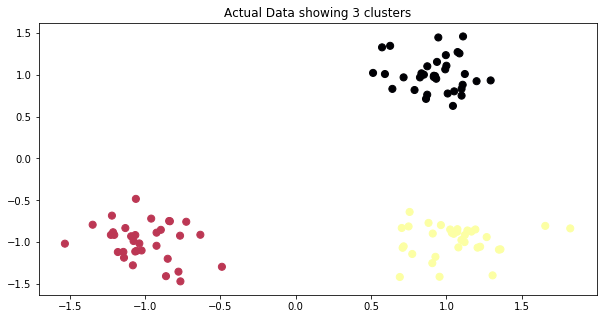

In [20]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, y = make_blobs(n_samples=100, centers=centers,random_state=2,cluster_std=0.2)
fig,ax = plt.subplots(figsize=(10,5))
ax.set_title("Actual Data showing 3 clusters")
ax.scatter(X[:,0],X[:,1],c=y,s=50,cmap = 'inferno');

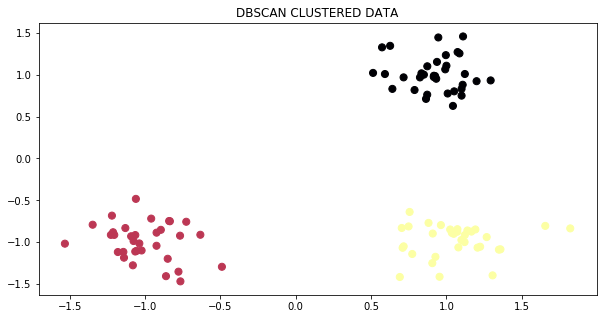

In [22]:
eps = 1
minpts = 3
D = X

def update_labels(X,pt,eps,labels,cluster_val):
    neighbors = []
    label_index = []
    for i in range(X.shape[0]):
        if np.linalg.norm(X[pt]-X[i])<eps:
            neighbors.append(X[i])
            label_index.append(i)
    if len(neighbors) <minpts:
        for i in range(len(labels)):
            if i in label_index:
                labels[i]=-1
    else:
        for i in range(len(labels)):
            if i in label_index:
                labels[i]=cluster_val
    return labels

labels = [0]*X.shape[0]
C = 1
for p in range(X.shape[0]):
    if labels[p]==0:
        labels = update_labels(X,p,eps,labels,C)
        C= C+1
        
fig,ax = plt.subplots(figsize=(10,5))
ax.set_title("DBSCAN CLUSTERED DATA")
ax.scatter(X[:,0],X[:,1],c=labels,s=50,cmap = 'inferno');